## Setup


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from sklearn.model_selection import TimeSeriesSplit
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# Import Data from Colab

In [2]:
from google.colab import drive
import pandas as pd
import glob
drive.mount('/content/drive/')
li = []
root_dir = '/content/drive/MyDrive/TrainingData/*__x.csv'
files = glob.glob(root_dir)
for filename in files:
    df = pd.read_csv(filename, header=None)
    li.append(df)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Normalize data




In [3]:

# import sklearn
from sklearn.preprocessing import Normalizer,scale,minmax_scale
from sklearn.model_selection import KFold, cross_val_score, train_test_split

data = pd.concat(li)
# data=(data-data.mean())/data.std()
# data=normalized_data
# data.iloc[:,:] = Normalizer(norm='l1').fit_transform(data)
# # print(data.std)
# data=data.reset_index(drop=True)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
x_movingwindows=[]
i=0

while i <=len(data)-160:
    data_0 = NormalizeData(data[0][i:i+160])
    data_1 = NormalizeData(data[1][i:i+160])
    data_2 = NormalizeData(data[2][i:i+160])
    data_3 = NormalizeData(data[3][i:i+160])
    data_4 = NormalizeData(data[4][i:i+160])
    data_5 = NormalizeData(data[5][i:i+160])
    frames = [data_0,data_1,data_2,data_3,data_4,data_5]
    # frames=[data[0][i:i+160],data[1][i:i+160],data[2][i:i+160],data[3][i:i+160],data[4][i:i+160],data[5][i:i+160]]
    # frames = Normalizer(norm='l1').fit_transform(frames)
    # for j in range(0,160):
      # frames=[data[0][i+j],data[1][i],data[2][i],data[3][i],data[4][i],data[5][i]]
    result=np.array(pd.concat(frames))
    x_movingwindows.append(result)
    frames=[]
    result=[]
    i=i+40
x_movingwindows = np.array(x_movingwindows)

In [4]:
data.shape

(1341646, 6)

In [5]:
# from sklearn.model_selection import TimeSeriesSplit

# print(x_movingwindows)

In [6]:
len(x_movingwindows)

33538

In [7]:

# print(x_movingwindows[0:5])

#take the mode of the y
files_y = glob.glob('/content/drive/MyDrive/TrainingData/*__y.csv')
# print(files_y)
liy = []

for filename_y in files_y:
    df_y = pd.read_csv(filename_y, header=None)
    liy.append(df_y)

data_y = pd.concat(liy)
data_y=data_y.reset_index(drop=True)
j=0
y_data=[]
while j <=len(data_y)-40:
    b=data_y[j:j+40].value_counts(ascending= False)
    a=list(b.index)
    y_data.append(a[0])
    j=j+10

#split to train and validaion



In [8]:
x_train, x_validation,y_train,y_validation = train_test_split(x_movingwindows,y_data)


In [86]:
x_movingwindows.shape

(33538, 960)

In [9]:
x_train=x_train.reshape(len(x_train),160,6,-1)
# x_validation=x_validation.reshape(len(x_validation),160,6,-1)

In [10]:
x_train.shape

(25153, 160, 6, 1)

In [11]:
x_validation=x_validation.reshape(len(x_validation),160,6,-1)

In [12]:
len(y_train)

25153

## Create a sampling layer


In [127]:

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        # epsilon = keras.backend.random_normal(shape=(keras.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon



## Build the encoder


In [128]:
# latent_space_dim = 3
# x = keras.layers.Input(shape=(160, 6, 1), name="encoder_input")
# encoder_conv_layer1 = keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_1")(x)
# encoder_norm_layer1 = keras.layers.BatchNormalization(name="encoder_norm_1")(encoder_conv_layer1)
# encoder_activ_layer1 =keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_norm_layer1)

# encoder_conv_layer2 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_2")(encoder_activ_layer1)
# encoder_norm_layer2 = keras.layers.BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)
# encoder_activ_layer2 = keras.layers.LeakyReLU(name="encoder_activ_layer_2")(encoder_norm_layer2)

# encoder_conv_layer3 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_3")(encoder_activ_layer2)
# encoder_norm_layer3 = keras.layers.BatchNormalization(name="encoder_norm_3")(encoder_conv_layer3)
# encoder_activ_layer3 = keras.layers.LeakyReLU(name="encoder_activ_layer_3")(encoder_norm_layer3)

# encoder_conv_layer4 = keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_4")(encoder_activ_layer3)
# encoder_norm_layer4 = keras.layers.BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)
# encoder_activ_layer4 = keras.layers.LeakyReLU(name="encoder_activ_layer_4")(encoder_norm_layer4)

# encoder_conv_layer5 = keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_activ_layer4)
# encoder_norm_layer5 = keras.layers.BatchNormalization(name="encoder_norm_5")(encoder_conv_layer5)
# encoder_activ_layer5 = keras.layers.LeakyReLU(name="encoder_activ_layer_5")(encoder_norm_layer5)


# shape_before_flatten = keras.backend.int_shape(encoder_activ_layer5)[1:]
# encoder_flatten = keras.layers.Flatten()(encoder_activ_layer5)

# encoder_mu = keras.layers.Dense(units=latent_space_dim, name="encoder_mu")(encoder_flatten)
# encoder_log_variance = keras.layers.Dense(units=latent_space_dim, name="encoder_log_variance")(encoder_flatten)

# encoder_mu_log_variance_model = keras.models.Model(x, (encoder_mu, encoder_log_variance), name="encoder_mu_log_variance_model")

# def sampling(mu_log_variance):
#     mu, log_variance = mu_log_variance
#     epsilon = keras.backend.random_normal(shape=keras.backend.shape(mu), mean=0.0, stddev=1.0)
#     random_sample = mu + keras.backend.exp(log_variance/2) * epsilon
#     return random_sample

# encoder_output = keras.layers.Lambda(sampling, name="encoder_output")([encoder_mu, encoder_log_variance])

# encoder = keras.models.Model(x, encoder_output, name="encoder_model")
# encoder.summary()

# latent_dim = 6
# encoder_inputs = keras.Input(shape=(160, 6, 1))
# x = layers.Conv1D(32, 3, strides=1, padding="same")(encoder_inputs)
# x = layers.BatchNormalization(name="encoder_norm_1")(x)
# x = layers.LeakyReLU(name="encoder_leakyrelu_1")(x)

# x = layers.Conv1D(64, 3, strides=1, padding="same")(x)
# x = layers.BatchNormalization(name="encoder_norm_2")(x)
# x = layers.LeakyReLU(name="encoder_leakyrelu_2")(x)

# x = layers.Conv1D(128, 3, strides=1, padding="same")(x)
# x = layers.BatchNormalization(name="encoder_norm_3")(x)
# x = layers.LeakyReLU(name="encoder_leakyrelu_3")(x)

# x = layers.Conv1D(128, 3, strides=1, padding="same")(x)
# x = layers.BatchNormalization(name="encoder_norm_4")(x)
# x = layers.LeakyReLU(name="encoder_leakyrelu_4")(x)


# x = layers.Flatten()(x)
# x = layers.Dense(6, activation="LeakyReLU")(x)
# z_mean = layers.Dense(latent_dim, name="z_mean")(x)
# z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
# z = Sampling()([z_mean, z_log_var])
# encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
# encoder.summary()

latent_dim = 3
encoder_inputs = keras.Input(shape=(160, 6, 1))
x = layers.Conv2D(64, 3, activation="LeakyReLU", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(128, 3, activation="LeakyReLU", strides=1, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="LeakyReLU")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# latent_dim = 3
# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(160,6), return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=False))
# model.add(RepeatVector(timesteps))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(n_features)))
# model.compile(optimizer='adam', loss='mse')
# model.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 160, 6, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 80, 3, 64)    640         ['input_5[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 80, 3, 128)   73856       ['conv2d_2[0][0]']               
                                                                                                  
 flatten_2 (Flatten)            (None, 30720)        0           ['conv2d_3[0][0]']               
                                                                                            

## Build the decoder


In [129]:


# decoder_input = keras.layers.Input(shape=(latent_space_dim), name="decoder_input")
# decoder_dense_layer1 =keras.layers.Dense(units=np.prod(shape_before_flatten), name="decoder_dense_1")(decoder_input)
# decoder_reshape =keras.layers.Reshape(target_shape=shape_before_flatten)(decoder_dense_layer1)
# decoder_conv_tran_layer1 = keras.layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_1")(decoder_reshape)
# decoder_norm_layer1 = keras.layers.BatchNormalization(name="decoder_norm_1")(decoder_conv_tran_layer1)
# decoder_activ_layer1 = keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_norm_layer1)

# decoder_conv_tran_layer2 = keras.layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_2")(decoder_activ_layer1)
# decoder_norm_layer2 = keras.layers.BatchNormalization(name="decoder_norm_2")(decoder_conv_tran_layer2)
# decoder_activ_layer2 = keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_norm_layer2)

# decoder_conv_tran_layer3 = keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_3")(decoder_activ_layer2)
# decoder_norm_layer3 = keras.layers.BatchNormalization(name="decoder_norm_3")(decoder_conv_tran_layer3)
# decoder_activ_layer3 = keras.layers.LeakyReLU(name="decoder_leakyrelu_3")(decoder_norm_layer3)

# decoder_conv_tran_layer4 = keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_4")(decoder_activ_layer3)
# decoder_norm_layer4 = keras.layers.BatchNormalization(name="decoder_norm_4")(decoder_conv_tran_layer4)
# decoder_activ_layer4 = keras.layers.LeakyReLU(name="decoder_leakyrelu_4")(decoder_norm_layer4)

# decoder_conv_tran_layer5 = keras.layers.Conv2DTranspose(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_5")(decoder_activ_layer4)
# decoder_output = keras.layers.LeakyReLU(name="decoder_output")(decoder_conv_tran_layer5 )

# decoder = keras.Model(decoder_input, decoder_output, name="decoder_model")
# decoder.summary()


# latent_inputs = keras.Input(shape=(latent_dim,))
# x = layers.Dense(160 * 6 * 128, activation="LeakyReLU")(latent_inputs)
# x = layers.Reshape((160, 6, 128))(x)
# # x = layers.Conv2D(64, 3, activation="relu", strides=1, padding="same")(x)
# x = layers.Conv2DTranspose(128, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.BatchNormalization(name="decoder_norm_1")(x)
# x = layers.LeakyReLU(name="decoder_leakyrelu_1")(x)

# x = layers.Conv2DTranspose(128, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.BatchNormalization(name="decoder_norm_2")(x)
# x = layers.LeakyReLU(name="decoder_leakyrelu_2")(x)

# x = layers.Conv2DTranspose(64, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.BatchNormalization(name="decoder_norm_3")(x)
# x = layers.LeakyReLU(name="decoder_leakyrelu_3")(x)

# x = layers.Conv2DTranspose(32, 3, activation="LeakyReLU", strides=1, padding="same")(x)
# x = layers.BatchNormalization(name="decoder_norm_4")(x)
# x = layers.LeakyReLU(name="decoder_leakyrelu_4")(x)



# decoder_outputs = layers.Conv2DTranspose(1, 3, activation="LeakyReLU", padding="same")(x)
# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
# decoder.summary()


latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(80 * 3 * 128, activation="LeakyReLU")(latent_inputs)
# x = layers.Conv1DTranspose(64, 3)(latent_inputs)
x = layers.Reshape((80, 3, 128))(x)
# x = layers.Conv2D(64, 3, activation="relu", strides=1, padding="same")(x)
x = layers.Conv2DTranspose(128, 3, activation="LeakyReLU", strides=1, padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="LeakyReLU", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="LeakyReLU", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_5 (Dense)             (None, 30720)             122880    
                                                                 
 reshape_2 (Reshape)         (None, 80, 3, 128)        0         
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 80, 3, 128)       147584    
 ranspose)                                                       
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 160, 6, 64)       73792     
 ranspose)                                                       
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 160, 6, 1)        577 

In [ ]:
keras.utils.plot_model(decoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
keras.utils.plot_model(encoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Define the VAE as a `Model` with a custom `train_step`


In [107]:
!pip install focal_loss

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/locations/__init__.py", line 9, in <module>
    from . import _distutils, _sysconfig
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/locations/_distutils.py", line 9, in <module>
    from distutils.command.install import SCHEME_KEYS
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 321, in __exit__
  File "<frozen importlib._bootstrap>", line 321, in <genexpr>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (

In [130]:

from focal_loss import sparse_categorical_focal_loss,binary_focal_loss
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]
  
    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            # reconstruction_loss = sparse_categorical_focal_loss(data, reconstruction,gamma = 2)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    parse_categorical_focal_loss(data, reconstruction,gamma = 2), axis=(1, 2)
                )
            )
            # reconstruction_loss = tf.reduce_mean(
            #     tf.reduce_sum(
            #         keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
            #     )
            # )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }



## Train the VAE


In [ ]:

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
# history_callback=vae.fit(x_train, epochs=200, batch_size=128)
vae.fit(x_train, epochs=10, batch_size=128)

# history_callback = model.fit(params...)
# loss_history = history_callback.history

# Display how the latent space clusters different digit classes


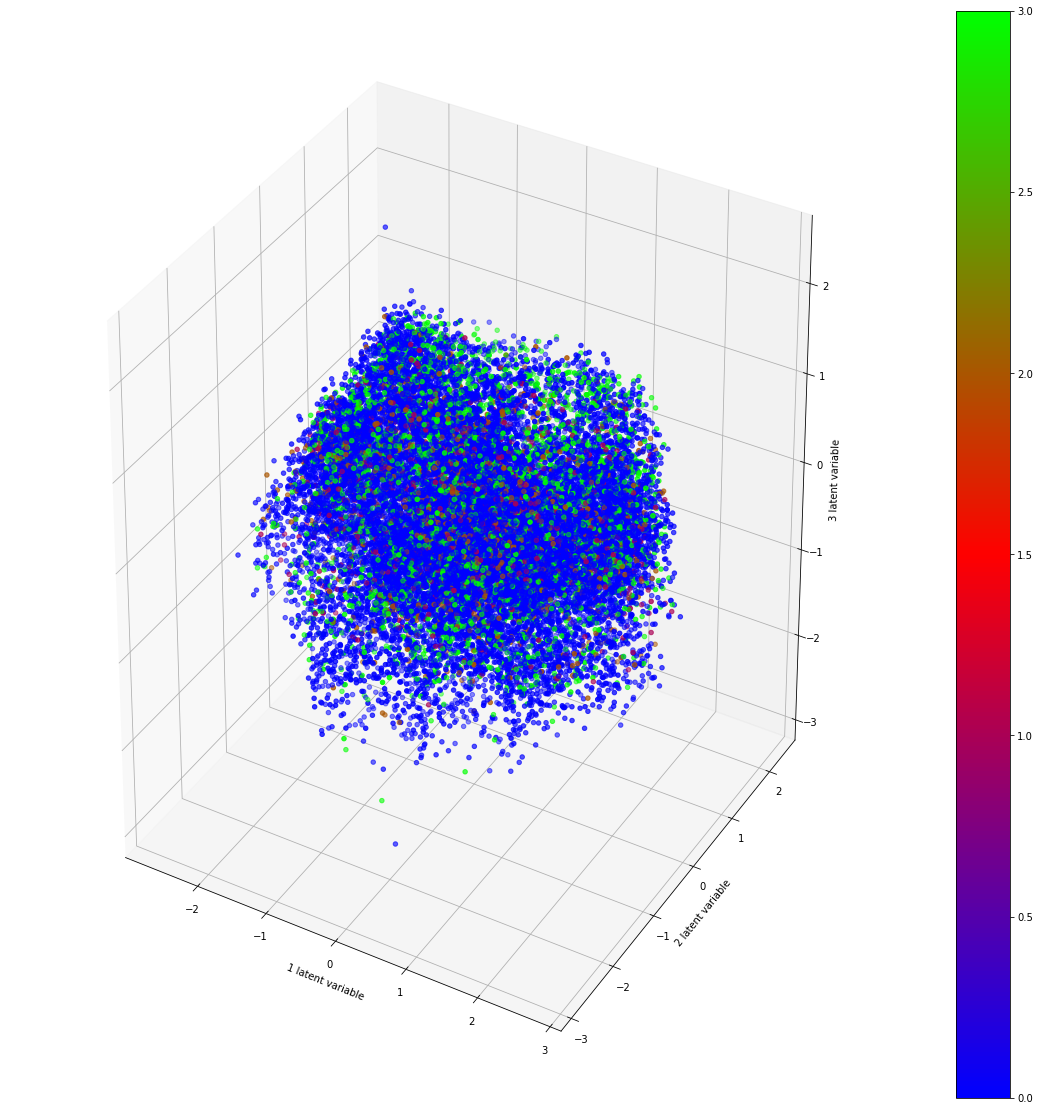

In [111]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# def plot_label_clusters(encoder, decoder, data, labels):
# display a 2D plot of the digit classes in the latent space
z_mean, z_log, z = encoder.predict(x_train)
# print(z_log)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
p=ax.scatter(z_mean[:, 2], z_mean[:, 1],z_mean[:, 0], c=y_train,cmap='brg')
ax.set_xlabel('1 latent variable')
ax.set_ylabel('2 latent variable')
ax.set_zlabel('3 latent variable')
fig.colorbar(p)
plt.show()
# fig=plt.figure(figsize=(12, 10))
# ax.scatter3D(z_mean[:, 0], z_mean[:, 1],z_mean[:, 2], c=y_train)
# fig.colorbar(ax) 
# fig.xlabel("z[0]")
# fig.ylabel("z[1]")
# fig.show()
  

# plot_label_clusters(encoder, decoder, x_train, y_train)


In [24]:
z.shape

(25153, 6)

In [112]:
x_decoded=decoder.predict(z,batch_size=128)
print(x_decoded.shape)
x_decoded=x_decoded.reshape(-1,960)
print(x_decoded.shape)

(25153, 160, 6, 1)
(25153, 960)


In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt
x_constr=x_train.reshape(-1,960)
rms = sqrt(mean_squared_error(x_constr, x_decoded))
print(rms)

0.1720990317079852


In [114]:
from scipy.spatial import distance
euclidean_dis=[]
for i in range(0,len(x_constr)):
  d = distance.euclidean(x_constr[i], x_decoded[i])
  euclidean_dis.append(d)
a=max(euclidean_dis)
print("Euclidean distance: ",euclidean_dis)
# print(a)
for j in range(0,len(euclidean_dis)):
  if float(a)==float(euclidean_dis[j]):
    b=int(j)



Euclidean distance:  [5.350701545044737, 4.981308978680256, 4.925522368010532, 4.706767040580245, 5.6954214793065585, 5.080054493520958, 6.695456786891921, 5.036909887561121, 5.078169852733857, 4.694145961014793, 4.528657080197199, 5.43912422918959, 5.115243724387413, 5.686429902384896, 5.704026102938908, 5.882707412698758, 5.529411067413435, 5.108447405707888, 5.657236188087749, 5.7720184198485445, 5.0582005650449755, 5.498510535322313, 4.654107019166188, 4.886725686699658, 4.742912849247868, 4.938571893175411, 4.780119264519294, 5.024950345667799, 5.767725894214044, 4.862135950606179, 4.847383879840156, 5.4145550435863345, 6.039297494073944, 4.461382369925228, 4.763123389415573, 5.665754387702226, 6.436836459080927, 5.305741240607369, 5.697742329735696, 4.982182057611181, 6.694725892161588, 4.584720819885318, 4.29368446260055, 5.882273191777602, 4.794305053115403, 5.536411588876758, 4.833292790381969, 6.099548732646454, 7.2057929023963165, 4.140780813967043, 4.947438928149518, 6.6171

In [115]:
samp=[]
for i in range(0,len(x_decoded[b])):
  samp.append(x_decoded[b][i])


In [116]:
ori=[]
for i in range(0,len(x_constr[b])):
  ori.append(x_constr[b][i])

In [ ]:
# samp

# Compare the reconstrtion signal with the original one


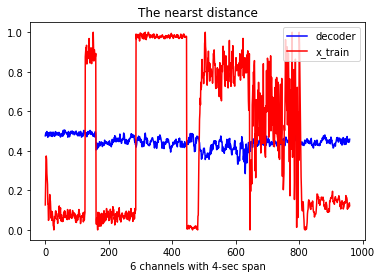

In [117]:
# x_decoded
time=[]
for i in range(0,len(samp)):
  time.append(i)
plt.plot(time, samp,color='blue',label='decoder')
plt.plot(time, ori,color='red',label='x_train')
plt.legend()
plt.xlabel("6 channels with 4-sec span")
plt.title("The nearst distance")
plt.show()

In [31]:
!pip install sklearn-crfsuite

# Implement CRF to train using the latent variables in order to perform predictions of the labels.

In [122]:
from itertools import chain
import nltk
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import sklearn
import pycrfsuite
import sklearn_crfsuite

# crf = CRF(algorithm='lbfgs',
#           c1=0.1,
#           c2=0.1,
#           max_iterations=100,
#           all_possible_transitions=False)
# trainer = pycrfsuite.Trainer(verbose=False)
# for x, y in zip(z, y_train):
#     trainer.append(xseq, yseq)
# trainer.set_params({
#     'c1': 1.0,   # coefficient for L1 penalty
#     'c2': 1e-3,  # coefficient for L2 penalty
#     'max_iterations': 50,  # stop earlier

#     # include transitions that are possible, but not observed
#     'feature.possible_transitions': True
# })
# # trainer.train()
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)
new_y = []
new_x = []
for i,j,k in zip(z_mean,z_log,z):
  new_x.append((i,j,k))
for y in y_train:
  new_y.append((str(y[0]),str(y[0]),str(y[0])))
  # print(y)
crf.fit(z, new_y);
# print(new_y)


In [87]:
x_validation = x_validation.reshape(-1,960)

In [123]:
from sklearn.model_selection import cross_val_predict, cross_val_score
new_y_validation = []
for y in y_validation:
  new_y_validation.append((str(y[0]),str(y[0]),str(y[0]),str(y[0]),str(y[0]),str(y[0])))
  # print(y)
pred = cross_val_predict(estimator=crf, X=z, y=new_y, cv=5)
report = flat_classification_report(y_pred=pred, y_true=new_y)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86     56514
           1       0.00      0.00      0.00      3174
           2       0.00      0.00      0.00      4071
           3       0.00      0.00      0.00     11700

    accuracy                           0.75     75459
   macro avg       0.19      0.25      0.21     75459
weighted avg       0.56      0.75      0.64     75459

